# Somatotopy code tutorial 2- input set creation and analysis

### NOTE: You will need to add the file 'hand_inputs_tutorial.npy' into the tutorial folder once pulling from Github or create new input set.

In this demo we will create input sets and run analysis.

In [1]:
# import relevant packages

%load_ext autoreload
%autoreload 2
import pickle as pk
import touchsim as ts
from touchsim.plotting import plot, figsave
import numpy as np
import holoviews as hv
hv.notebook_extension()
%output holomap='scrubber' # animate holomaps
import somatotopic_maps as sp
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load the hand population

Firstly, we will load a hand population that has already been created.

In [2]:
# load handpop
with open('hand_pop_obj.pkl', 'rb') as f:
    hand_pop = pk.load(f)

In [3]:
# check the hand pop has been created, and the number of regions it contains.
print(hand_pop.ts_hand.surface)

Surface with 20 regions.


:Overlay
   .Path.I   :Path   [x,y]
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)
   .Labels.I :Labels   [x,y]   (Label)
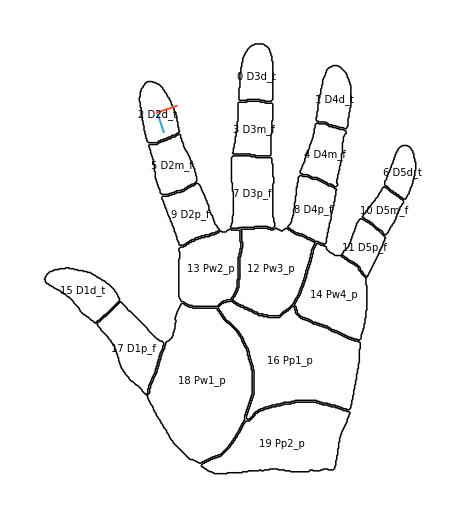

In [4]:
# plot the hand surface with regions labelled.
%output size=250
plot(hand_pop.ts_hand.surface,tags=True,coord=10) 

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Points   [x,y]
   .Path.I      :Path   [x,y]
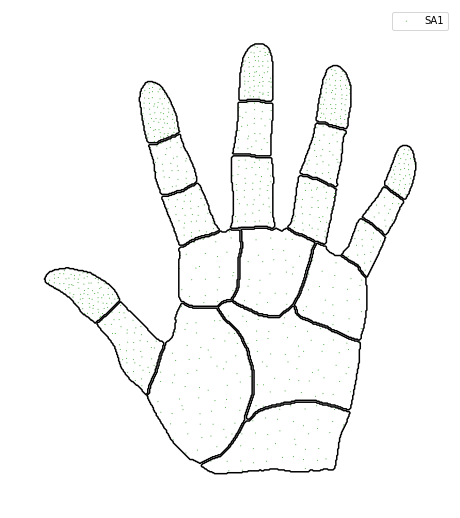

In [5]:
# plot the hand surface and afferents
%output size=250
plot(hand_pop.ts_hand,tags=True,coord=10) *plot()

### Percentage of afferents in each region

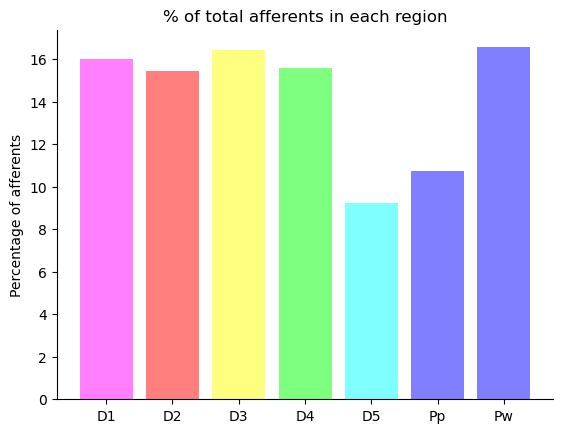

In [6]:
# afferents counts in the main regions
_ = sp.aff_counts(hand_pop, plot=True)

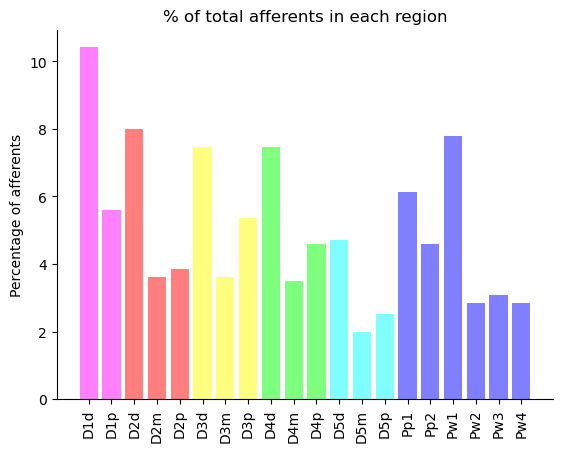

In [7]:
# afferents counts in the sub regions
_ = sp.aff_counts(hand_pop, plot=True, type_hand='sub')

## Creating statistics for input stimuli

Create some statistics of contact- here we just use generic statistics calculated from Gonzalez.

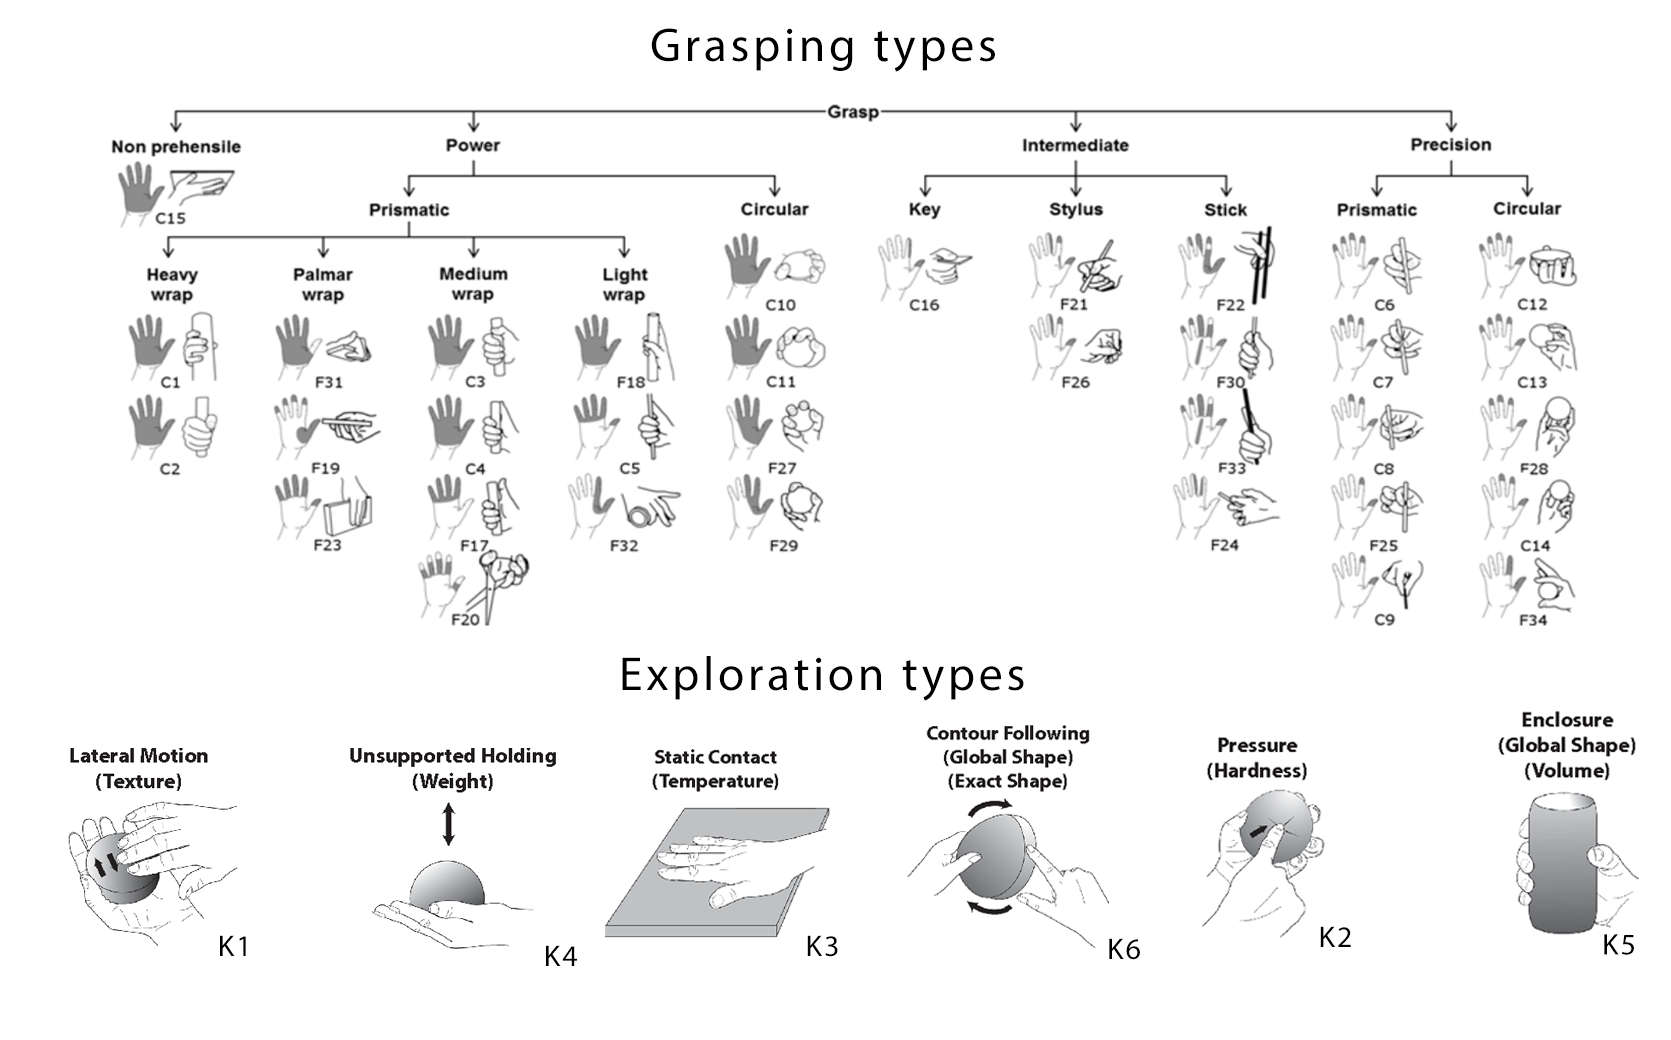

In [8]:
# Viewing the hand grasps in Gonzalez.
Image(filename ="../somatotopic_maps/model_input/Grasping_exploration_types.png")

Now we will create our own stats using a list of grasps and the amount of time that grasp is used.
There are different options including:
1. Region selection- include only certain regions.
2. Category axis- Changes the filtering on the statistics database: Can be done by main type of grasp eg. Power, Intermediate. 
    2. 'Main type' for main type of grasp eg. Power, Intermediate. 
    2. 'Category' for grasping category. Options are 'E' for exploratory, and 'M' for manipulative.
    2. 'Grasp type' for grasping type. Options include: Exploration, Prismatic, Circular.
    2. 'Sub type' for grasping sub type. Options include Lateral motion, Pressure, Stylus, Heavy Wrap etc.
3. Grasps individual- select individual grasps to be included.

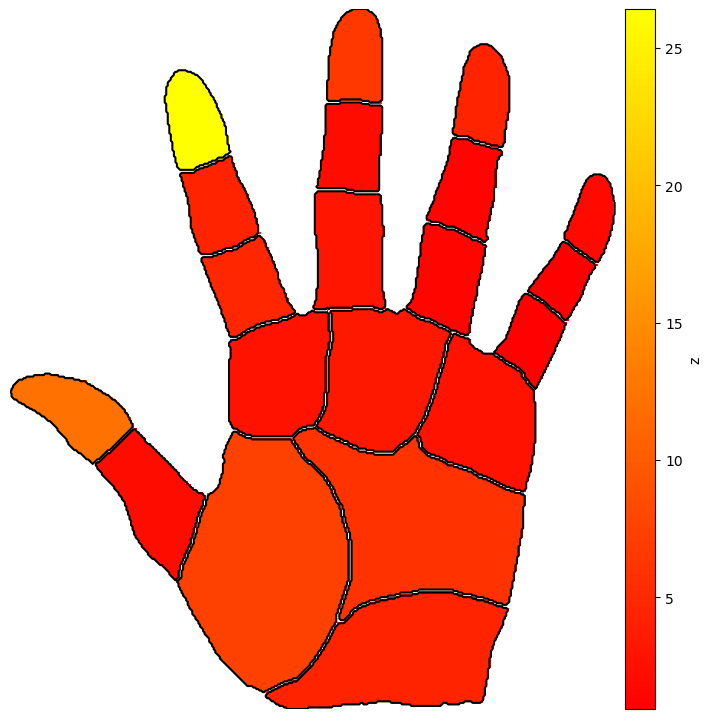

In [9]:
# Create a dictionary of standard statistics of contact based on Gonzalez.
stats_dict_1 = sp.get_contact_stats()

# plot the statistics as a heat map on the hand. Type of heatmap can be changed by passing a different cmap name.
p = plot(fill=stats_dict_1).options(cmap='autumn',colorbar=True) 
hv.render(p * plot(hand_pop.ts_hand.surface))

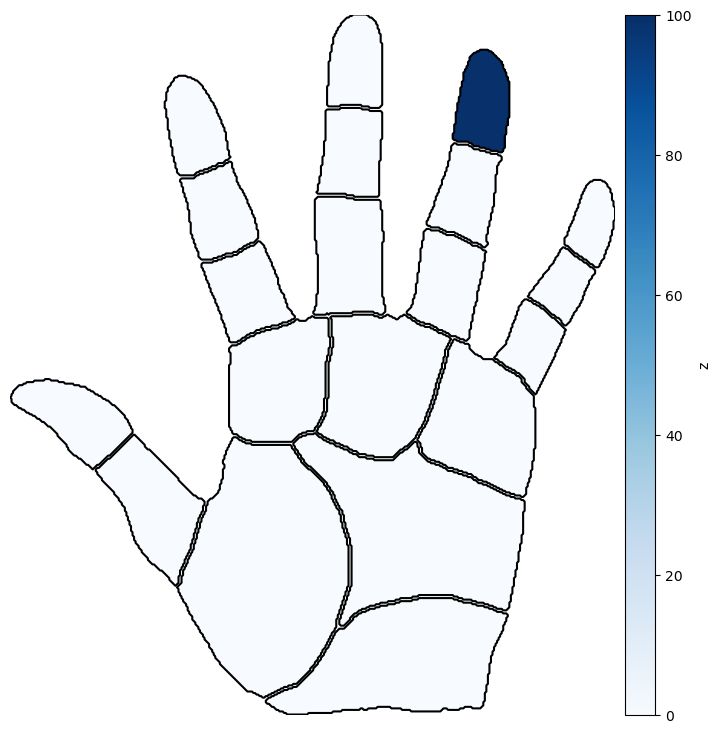

In [10]:
# Exploratory grasps with only the fourth digit tip.
stats_dict_2 = sp.get_contact_stats(regions=['D4d'],cat_axis='Category',cat_axis_list=['E'])

p = plot(fill=stats_dict_2).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

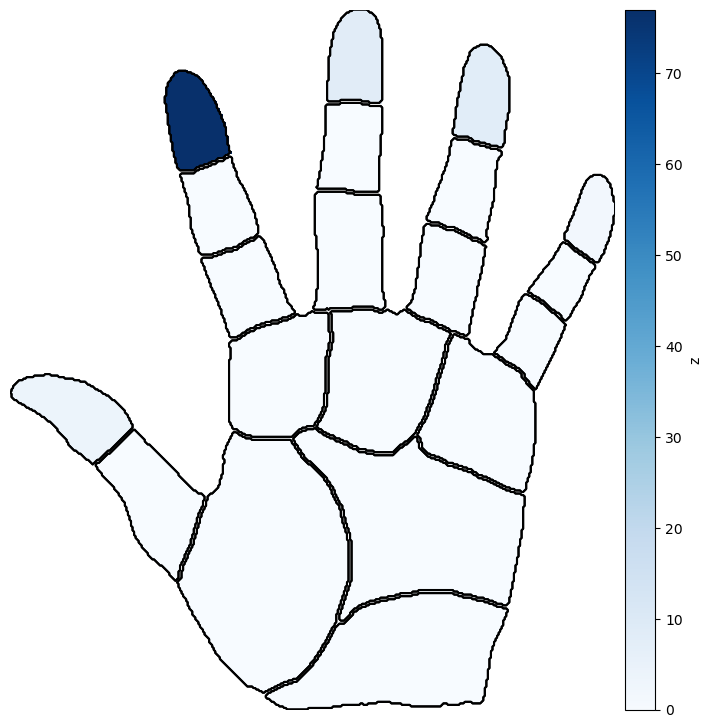

In [11]:
# Exploratory grasps with all fingertips
stats_dict_3 = sp.get_contact_stats(regions=['D1d','D2d','D3d','D4d','D5d'],cat_axis='Category',cat_axis_list=['E'])
p = plot(fill=stats_dict_3).options(cmap='Blues',colorbar=True) *plot()
hv.render(p * plot(hand_pop.ts_hand.surface))

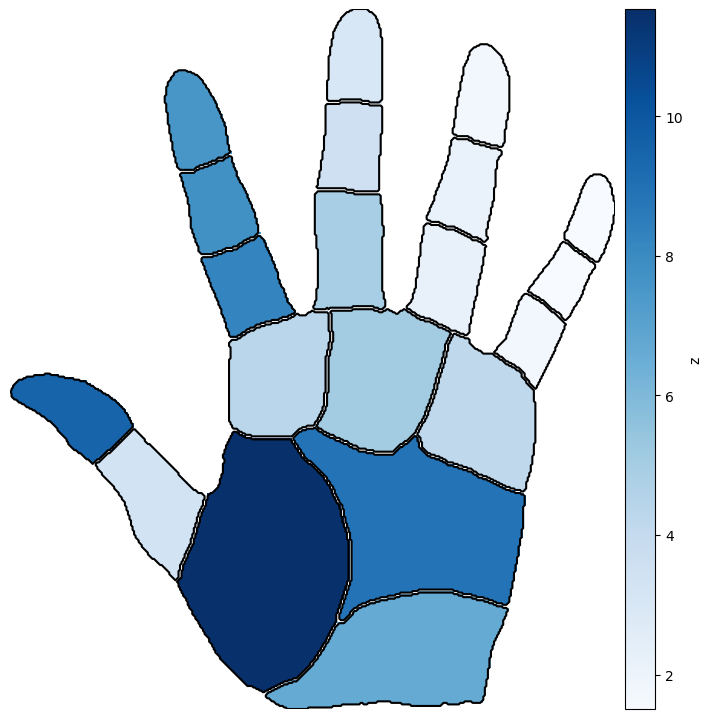

In [12]:
# Intermediate and power grasps with all hand regions included
stats_dict_4 = sp.get_contact_stats(cat_axis='Main type',cat_axis_list=['Intermediate','Power'])

p = plot(fill=stats_dict_4).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

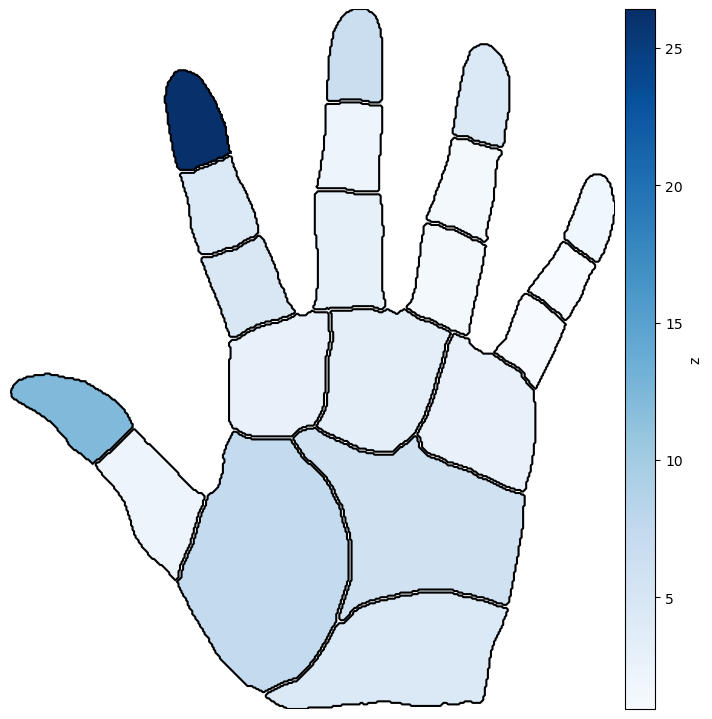

In [13]:
# Select by specific grasps
stats_dict_5 = sp.get_contact_stats(grasps_individual=['F29'])

p = plot(fill=stats_dict_5).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

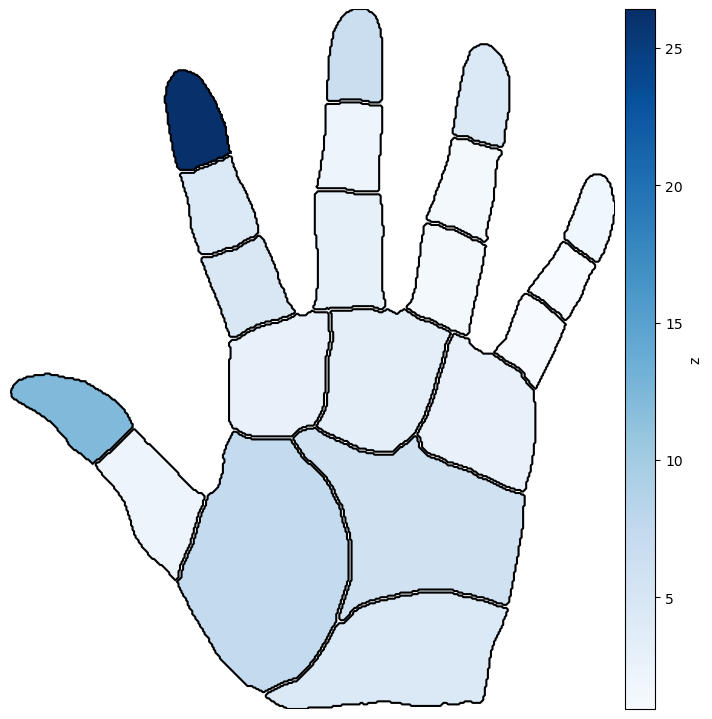

In [14]:
# Select by specific grasps
stats_dict_5 = sp.get_contact_stats(grasps_individual=['C3'])

p = plot(fill=stats_dict_5).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

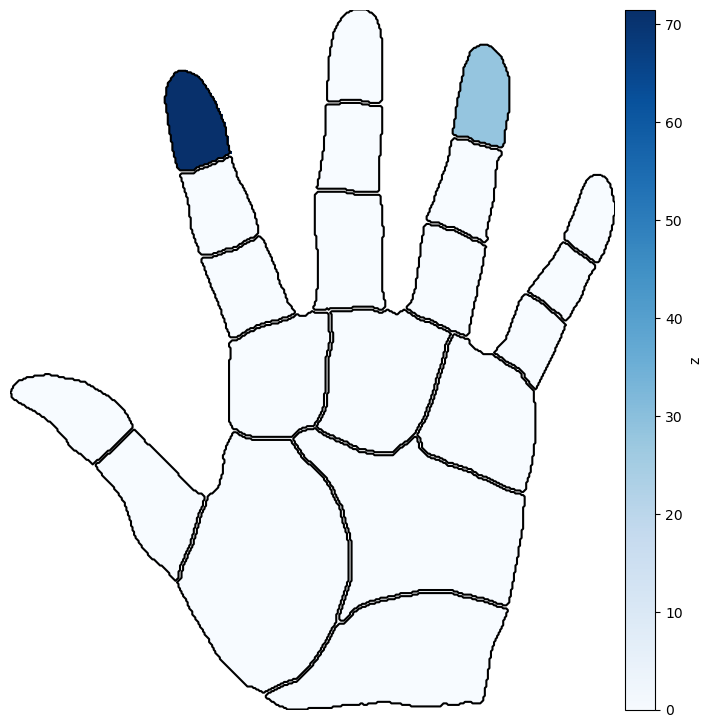

In [15]:
# Select by specific grasps and regions
stats_dict_6 = sp.get_contact_stats(regions=['D4d','D2d'],grasps_individual=['K6','K3','C3','F29'])

p = plot(fill=stats_dict_6).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

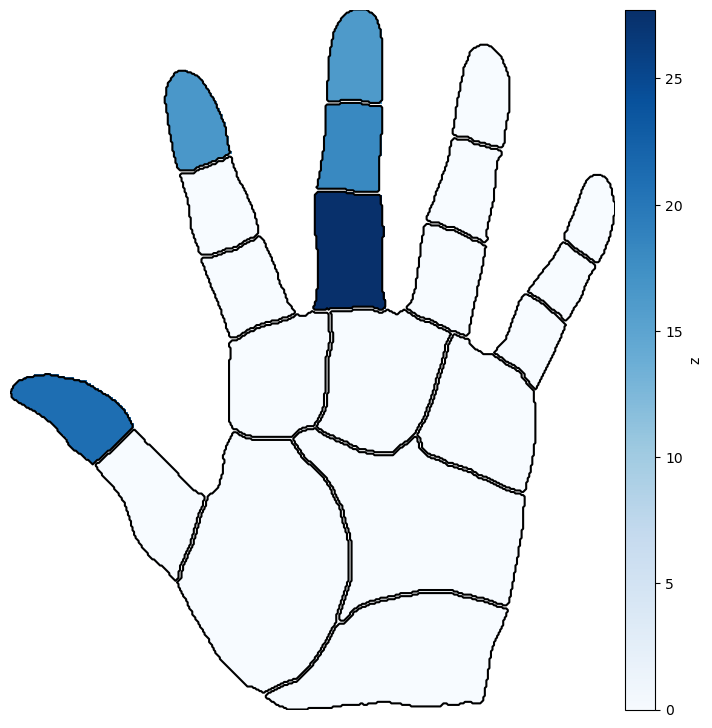

In [16]:
# Intermediate and power grasps with all hand regions included
stats_dict_7 = sp.get_contact_stats(cat_axis='Sub type',cat_axis_list=['Stylus'])

p = plot(fill=stats_dict_7).options(cmap='Blues',colorbar=True)
hv.render(p * plot(hand_pop.ts_hand.surface))

## Creating the input set

We will test creating two input sets. The first will have the statistics uniformly across the hand, the second we will pass statistics created with the statistics generator.

### Uniform inputs

In [17]:
# set string name of file        
hand = 'hand_pop_uniform'

input_seed = 1

stimuli_num = 20 #000

# run the input generator file.
model_inputs = sp.hand_input(hand_pop, tag=hand, stimuli_num=stimuli_num, seed=input_seed, save=True) # change to touchsim params
        
# save hand inputs- comment out after generation of stimuli
#with open('hand_inputs_tutorial.pkl', 'wb') as file:
#    pk.dump(model_inputs, file)


Stim: 100%|████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.81it/s]


### Variable statistics

In [18]:
# Prepare the statistics
# make stats_dict_1 ready to be a parameter for input_create
stats = sp.sort_stats(hand_pop.ts_hand,stats_dict_1)

# set string name of file
hand = 'hand_pop_stat'

input_seed = 1

stimuli_num = 100

# run the input generator file.
model_inputs = sp.hand_input(hand_pop, tag=hand, stimuli_num=stimuli_num, seed=input_seed, p=stats[1], save=True)

Stim: 100%|██████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.78it/s]


## Load the pre-made input set

We will use a pre-made input set for analysis.

In [19]:
# Load input set
with open('hand_inputs_tutorial.pkl', 'rb') as file:
    input_responses = pk.load(file)

## Analysing the input set

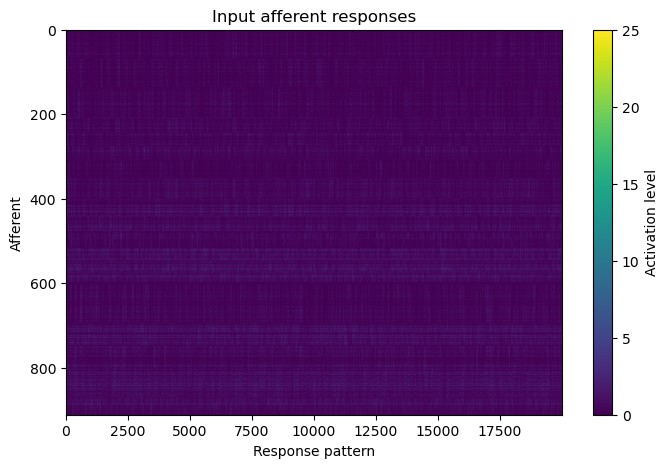

In [20]:
# View the responses- we will view part of the total responses
# sort by the afferent group- add lines?
sp.plot_input_responses(input_responses.input_data)
fig = plt.gcf()
fig.set_size_inches(8, 5)

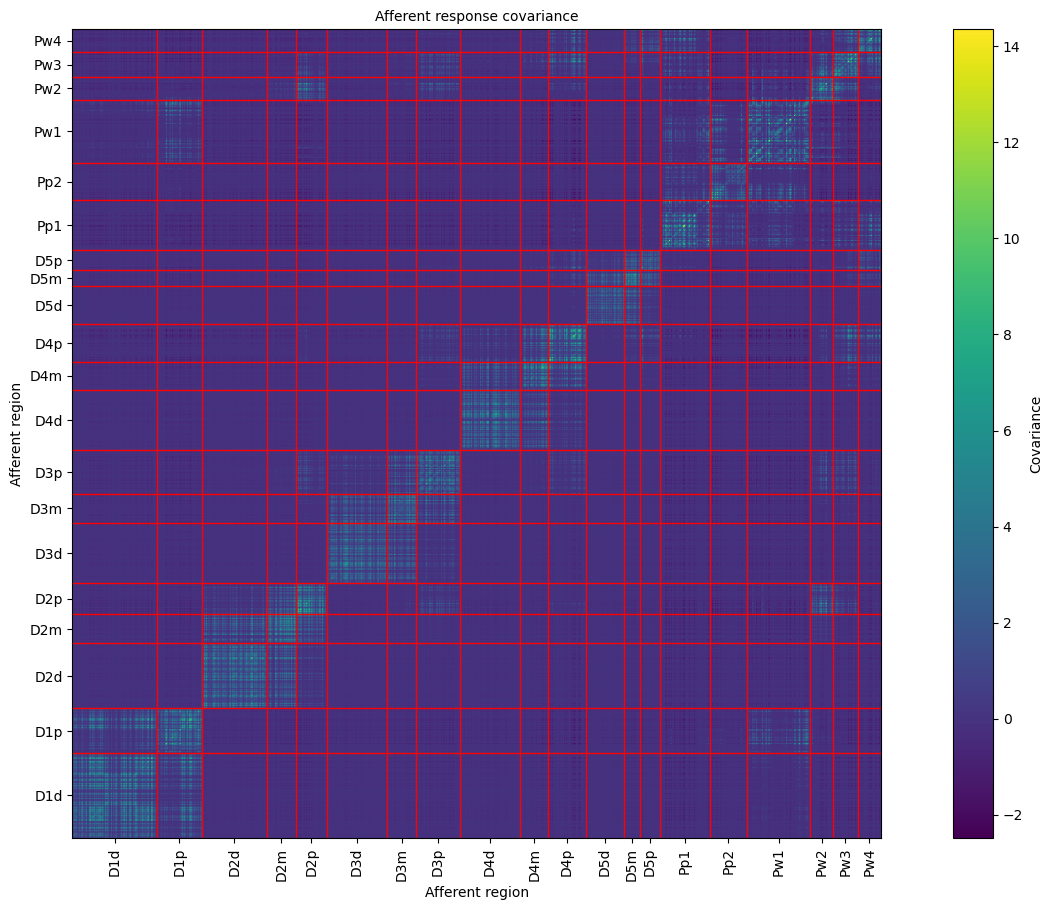

In [21]:
# View covariance of the responses- Higher covariance between regions indicates similarity of responses
sp.plot_input_covariance_sorted(input_responses.input_data,hand_pop)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [22]:
# Calculate number of stimuli placed in each region for the input set
count_values_tuple = sp.stimuli_count_peak_response(input_responses.input_data,hand_pop)[0]

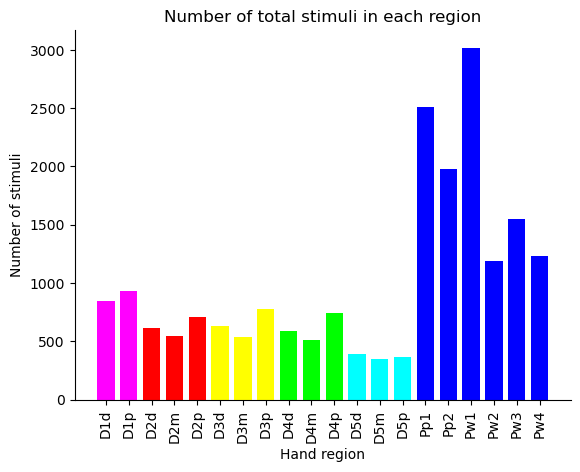

In [23]:
# plot as counts of stimuli in each region
sp.plot_input_counts(count_values_tuple,hand_pop)

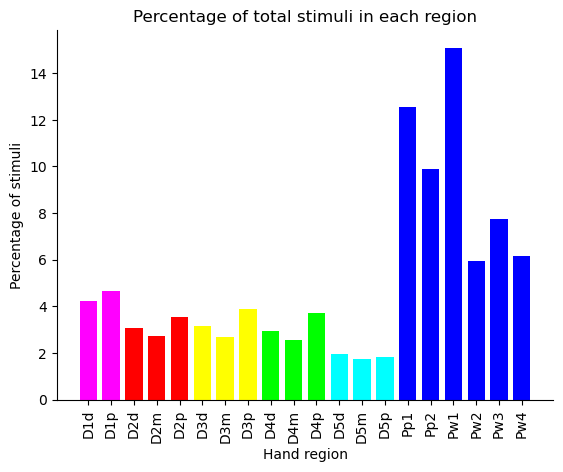

In [24]:
# plot as percentage of stimuli in each region
sp.plot_input_counts(count_values_tuple,hand_pop,type_count='per')